Testing multifits loading and using `gettp` on multiple files.

In [1]:
from dysh.fits.gbtfitsload import GBTFITSLoad
import dysh.util as util

In [2]:
# Point it to the testdata directory on the root dysh directory.
testdata = util.get_project_testdata()
#testdata = "/home/sandboxes/psalas/Dysh/dysh/testdata"
# The folder with multiple SDFITS files.
data_path = testdata  / "AGBT18B_354_03.raw.vegas"

In [3]:
sdf = GBTFITSLoad(data_path, verbose=False)

In [4]:
sdf.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,6.0,W49N,7.0,OffOn,1.0,45.077148,44.979549,4,2,4,1,128.090129,50.305025
1,7.0,W49N,7.0,OffOn,2.0,45.077148,44.979549,4,2,4,1,129.920889,50.435658


Up to this point, it works fine. It tells you there are multiple IFs (spectral windows).

Now, when we try to calibrate something, it breaks down.

In [5]:
ps_scans = sdf.getps(6, ifnum=2)

FILE  /home/mpound/src/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.A.fits
FILE  /home/mpound/src/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.A.fits
FILE  /home/mpound/src/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.B.fits
FILE  /home/mpound/src/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.C.fits
FILE  /home/mpound/src/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.D.fits


/home/mpound/src/dysh/src/dysh/spectra/core.py:346: RuntimeWarning: Mean of empty slice
  meandiff = np.nanmean(calon[chrng]) - np.nanmean(caloff[chrng])
/home/mpound/src/dysh/src/dysh/fits/gbtfitsload.py:949: UserWarning: no on/off scans found for given selection
  warnings.warn("no on/off scans found for given selection")


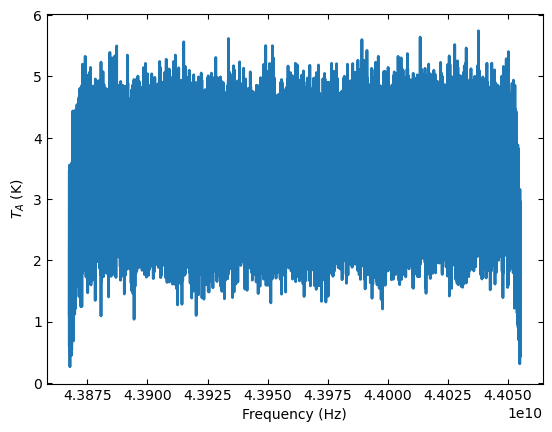

In [6]:
ps_scans[0].timeaverage().plot()

In [8]:
tg = GBTFITSLoad(data_path / "AGBT18B_354_03.raw.vegas.B.fits")
tg.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,6.0,W49N,7.0,OffOn,1.0,44.610393,44.979549,1,2,4,1,128.090105,50.304993
1,7.0,W49N,7.0,OffOn,2.0,44.610393,44.979549,1,2,4,1,129.920963,50.43569


In [9]:
tg.onoff_scan_list([6,7],ifnum=1)

FILE  /home/mpound/src/dysh/testdata/AGBT18B_354_03.raw.vegas/AGBT18B_354_03.raw.vegas.B.fits


{'ON': [7], 'OFF': [6]}